#Diabetes Prediction
Predict the diabetes according to the features.

#Importing data and overall data analysis


In [ ]:
pip install optuna

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

##Dataset
About the Diabetes_prediction.csv file. <br>
This dataset is synthetic and generated for diabetes prediction purposes. It includes various features related to diabetes risk factors and a corresponding diagnosis label indicating whether an individual has diabetes or not.<br>

* Pregnancies - Number of pregnancies the individual has had.
* Glucose - Plasma glucose concentration (mg/dL) measured during an oral glucose tolerance test.
* BloodPressure - Diastolic blood pressure (mm Hg).
* SkinThickness - Thickness of skinfold (mm) at the triceps.
* Insulin - 2-Hour serum insulin (mu U/ml).
* BMI - 2-Hour serum insulin (mu U/ml).
* DiabetesPedigreeFunction -Diabetes pedigree function, which represents the likelihood of diabetes based on family history.
* Age - Age of the individual (years).
* Diagnosis - Binary label indicating whether the individual has diabetes (1) or not (0).

In [3]:
df = pd.read_csv('Diabetes_prediction.csv')
df.head()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0            2  115.863387      56.410731      24.336736   94.385783   
1            2   92.490122      70.615520      23.443591  138.652426   
2            1   88.141469      63.262618      23.404364  149.358082   
3            2  108.453101      67.793632      20.751580  108.751638   
4            1  127.849443      94.725685      22.603078   25.269987   

         BMI  DiabetesPedigreeFunction        Age  Diagnosis  
0  26.455940                  0.272682  20.100494          0  
1  23.910167                  0.665160  44.912281          0  
2  21.948250                  0.676022  48.247873          1  
3  24.209304                  0.289636  42.749868          0  
4  32.997477                  0.601315  32.797789          0

In [4]:
df.shape

(1000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Diagnosis                 1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diagnosis                   0
dtype: int64

## Exploratory Data Analysis (EDA)
### 1. Numerical Values analysis

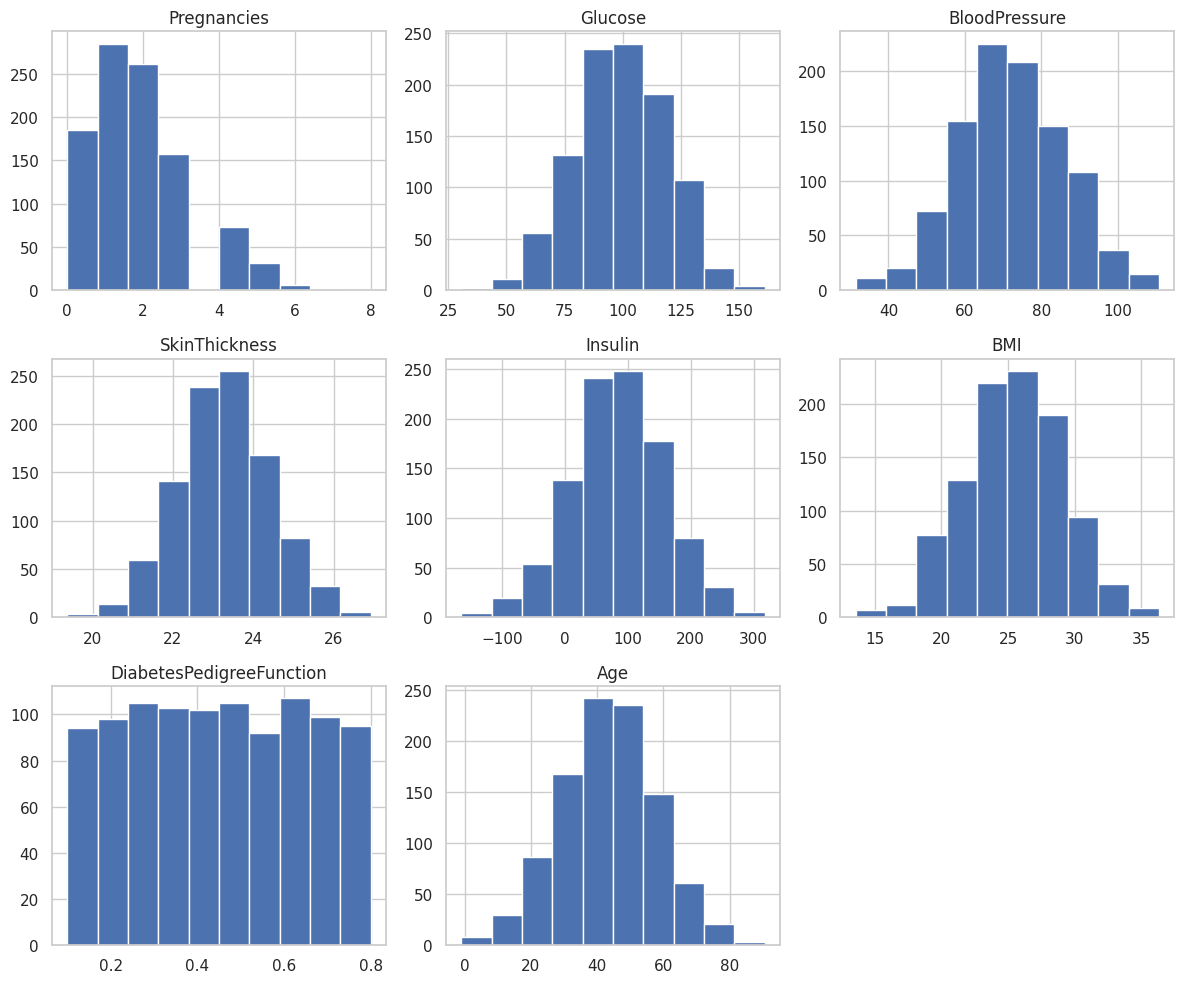

In [10]:
sns.set(style = 'whitegrid')

numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[numerical_features].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

### 2. Correlation analysis

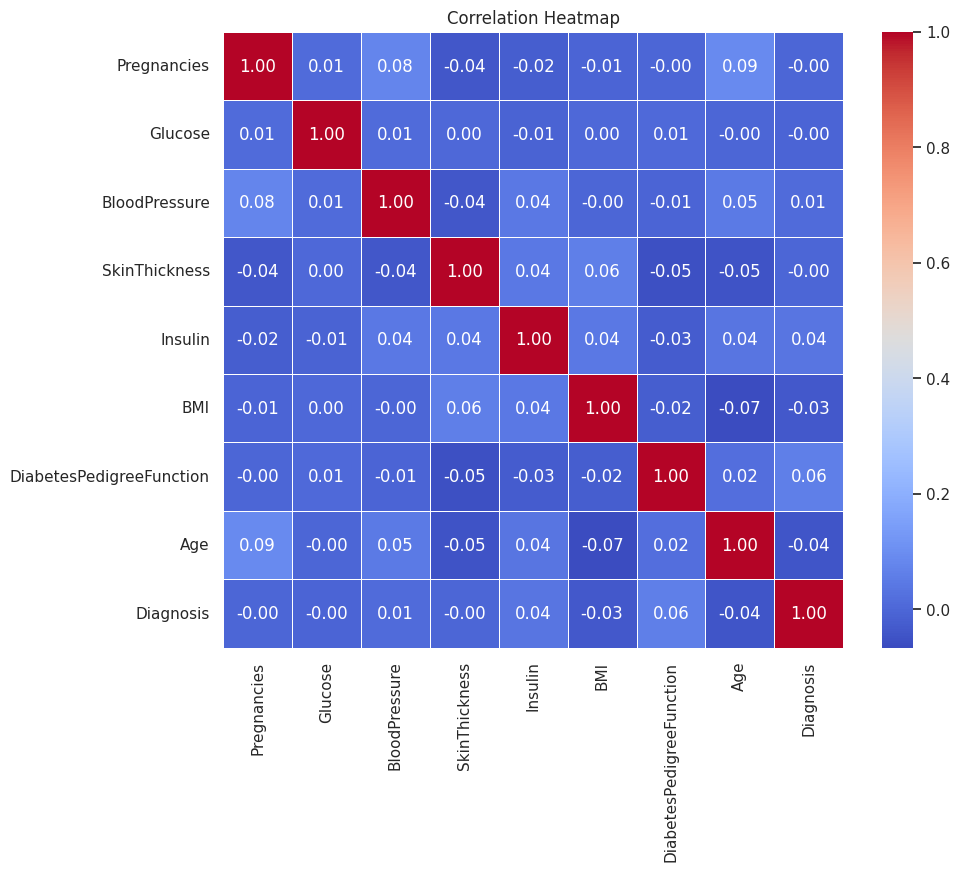

In [11]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 3. Distribution Plots

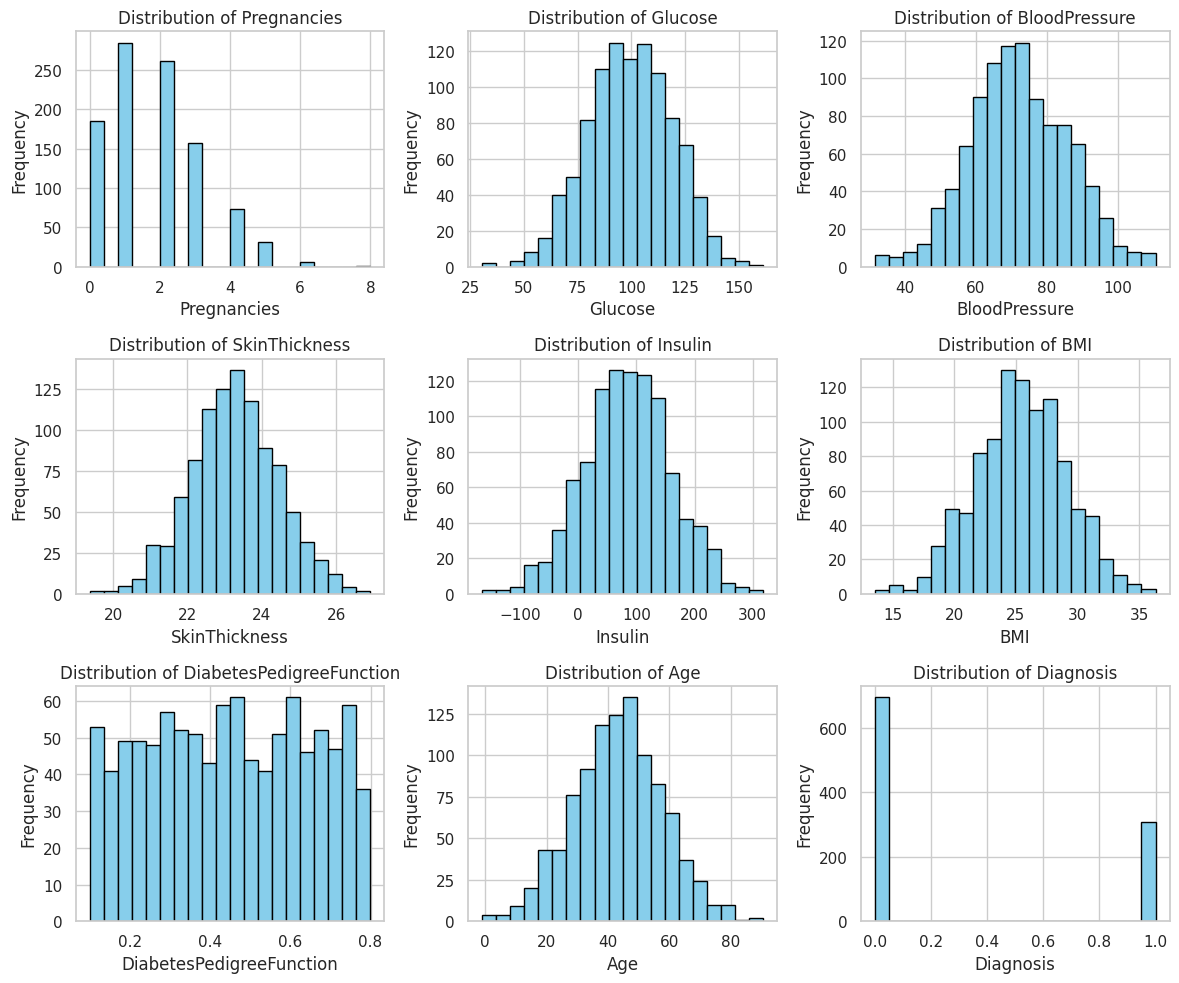

In [12]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Model Selection & Evaluation

## XGBClassifier with Optuna

In [30]:
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0, step=0.1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0, step=0.1),
        'gamma': trial.suggest_float('gamma', 0.0, 1.0, step=0.1),
        'min_child_weight': trial.suggest_float('min_child_weight', 1, 10, step=1)
    }

    X = df.drop(['Diagnosis'], axis =1)
    y = df['Diagnosis']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    model = xgb.XGBClassifier(**params)
    model.set_params(early_stopping_rounds=10)
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)

    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


In [37]:
print('\nBest hyperparameters:', study.best_params)
print('Best accuracy:', study.best_value)


Best hyperparameters: {'max_depth': 9, 'learning_rate': 0.013958652560433155, 'n_estimators': 300, 'subsample': 0.5, 'colsample_bytree': 0.9, 'gamma': 0.4, 'min_child_weight': 6.0}
Best accuracy: 0.685
